In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

_30k_main_palette_dict = {
    "blue": "#202F66",
    "orange": "#FF7048",
    "purple": "#8B87EA",
    "pink": "#D869AB",
    "cyan": "#54C9B9",
    "yellow": "#F3D36E",
}

_30k_danger_safe_palette_dict = {
    "danger": "#FF4F72",
    "safe": "#58EDB9",
}

_30k_text_palette_dict = {
    "text_black": "#32363A",
    "text_lighter1": "#6F7273",
    "text_lighter2": "#8B8E8F",
    "bg_cream": "#FAF7F4"
}

_font_mono = "Inconsolata"
_font_serif = "Canela"
_font_sans = "Gill Sans Nova"

plt.style.use("./utils/minus_thirty_k.mplstyle")

_30k = list(_30k_main_palette_dict.values())
sns.set_palette(_30k)

import warnings

warnings.filterwarnings('ignore')

from utils.tweets_utils import *


import lorem

import matplotlib

ModuleNotFoundError: No module named '_tkinter'

In [ ]:
def draw_circle(x1, x2, n_point=200):
    x_coor = np.linspace(x1, x2, n_point)
    
    radius = np.abs(x1 - x2)/2
    centre_coor = (x1 + x2)/2
    
    # x^2 + y^2 = r^2 (at centre = 0)
    y_coor = np.sqrt((radius**2 - (x_coor-centre_coor)**2))
    
    return x_coor, y_coor

In [ ]:
df = pd.read_csv("./data/tweets_2019-2020.csv")
users = pd.read_csv("./data/users_2019-2020.csv")
user_lookup = pd.read_csv("./data/users_lookup.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21364 entries, 0 to 21363
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tweetid                   21364 non-null  int64  
 1   userid                    21364 non-null  object 
 2   user_display_name         21364 non-null  object 
 3   user_screen_name          21364 non-null  object 
 4   user_reported_location    1386 non-null   object 
 5   user_profile_description  7781 non-null   object 
 6   user_profile_url          0 non-null      float64
 7   follower_count            21364 non-null  int64  
 8   following_count           21364 non-null  int64  
 9   account_creation_date     21364 non-null  object 
 10  account_language          21364 non-null  object 
 11  tweet_language            21364 non-null  object 
 12  tweet_text                21364 non-null  object 
 13  tweet_time                21364 non-null  object 
 14  tweet_

In [ ]:
user_lookup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   numeric_id    1438 non-null   object
 1   user_id       1438 non-null   object
 2   mention_freq  1438 non-null   int64 
 3   RT_freq       1438 non-null   int64 
 4   reply_freq    1438 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 56.3+ KB


# Split Mentioned accounts in equally space in x axis

- split, and map account id to x axis number
- create lookup table for coordiante-id for whole accounts

In [ ]:
most_mentioned_account = 20

In [ ]:
user_lookup.head(most_mentioned_account)

numeric_id           user_id  mention_freq  RT_freq  reply_freq
0   1214742430601187328          @army2pr          1830     1293         399
1             229313308      @armypr_news          1559      958         591
2             267243786    @WassanaNanuam           921      705         202
3             358491915    @1st_Army_Area           782      476         302
4             337604843        @weloverta           437      255         182
5              37950212          @ThaiPBS           436      253         179
6   1040252793339240448   @prayutofficial           347      211         129
7             199992361  @political_drama           346      279          40
8   1206467004338556929   @JuahuaHeadline           324      166         157
9              87732915    @SpringNews_TV           292      142         150
10  1212591967080574977          @Army4PR           276      149         101
11   980807795464220672      @FWPthailand           266       35         118
12             65314514   @MatichonOnline           253      129         113
13             86899675    @Thairath_News           229      115         108
14             53864669  @VoiceTVOfficial           227      105         112
15  1203162559353765891          @FCRMP02           216      161          55
16   735448052031361025        @boworn241           213      210           2
17           4711233222    @workpointnews           210      100         108
18             61995183     @ARMdhiravath           203       97          95
19  1136977159765934080  @Rorscha24745488           202      166          26

In [ ]:
total_user_length = most_mentioned_account + len(users)
total_user_length

474

In [ ]:
mentioned_users_index = np.round(np.linspace(0, total_user_length-1, most_mentioned_account))
mentioned_users_index

array([  0.,  25.,  50.,  75., 100., 124., 149., 174., 199., 224., 249.,
       274., 299., 324., 349., 373., 398., 423., 448., 473.])

In [ ]:
user_coor = pd.DataFrame({
    'id': [np.nan]*total_user_length,
    'coor': np.arange(0, total_user_length)
})

In [ ]:
for i, coor in enumerate(mentioned_users_index):
    user_coor.loc[coor, 'id'] = user_lookup.loc[i, 'user_id']
    
io_index = 0
for i, row in user_coor.iterrows():
    if user_coor.loc[i].isna().any():
        user_coor.loc[i, 'id'] = users.loc[io_index, 'userid']
        io_index += 1

In [ ]:
user_coor

id  coor
0                                        @army2pr     0
1     4Rg8F1jBZL0lsBk9i4THbOAa3qpwv+36xYV7mQ1I+Y=     1
2    eOifAtqkh40ODUQORKICOfeOOJKArKgN0crN10+5ANo=     2
3      ZCwPu1KjYq4RigpLALGmqbDVVCRi1cg86J6k8eMfA=     3
4     zJFTBwhq3yfvJAbNklosGGnHXgtp7U3NoW7zkW+0yY=     4
..                                            ...   ...
469  T1cX84ApT84kkawp1D5pcSYtPcsdk8zVgFVyey6vcwo=   469
470  HH792TcjzaNklQisghdaOAatkPA9Ho6adxkluLtDtxw=   470
471   N+7qn8lpk2mXeRDWqCMNO95dfKszcrt+bpEGFahNR8=   471
472  iqrkxnYCAMZQgg3+5Ed5LdmQj0c1WP2eZvJGJU9LZYI=   472
473                              @Rorscha24745488   473

[474 rows x 2 columns]

In [ ]:
colours = list(sns.color_palette('inferno', n_colors=most_mentioned_account+5))[:most_mentioned_account][::-1]

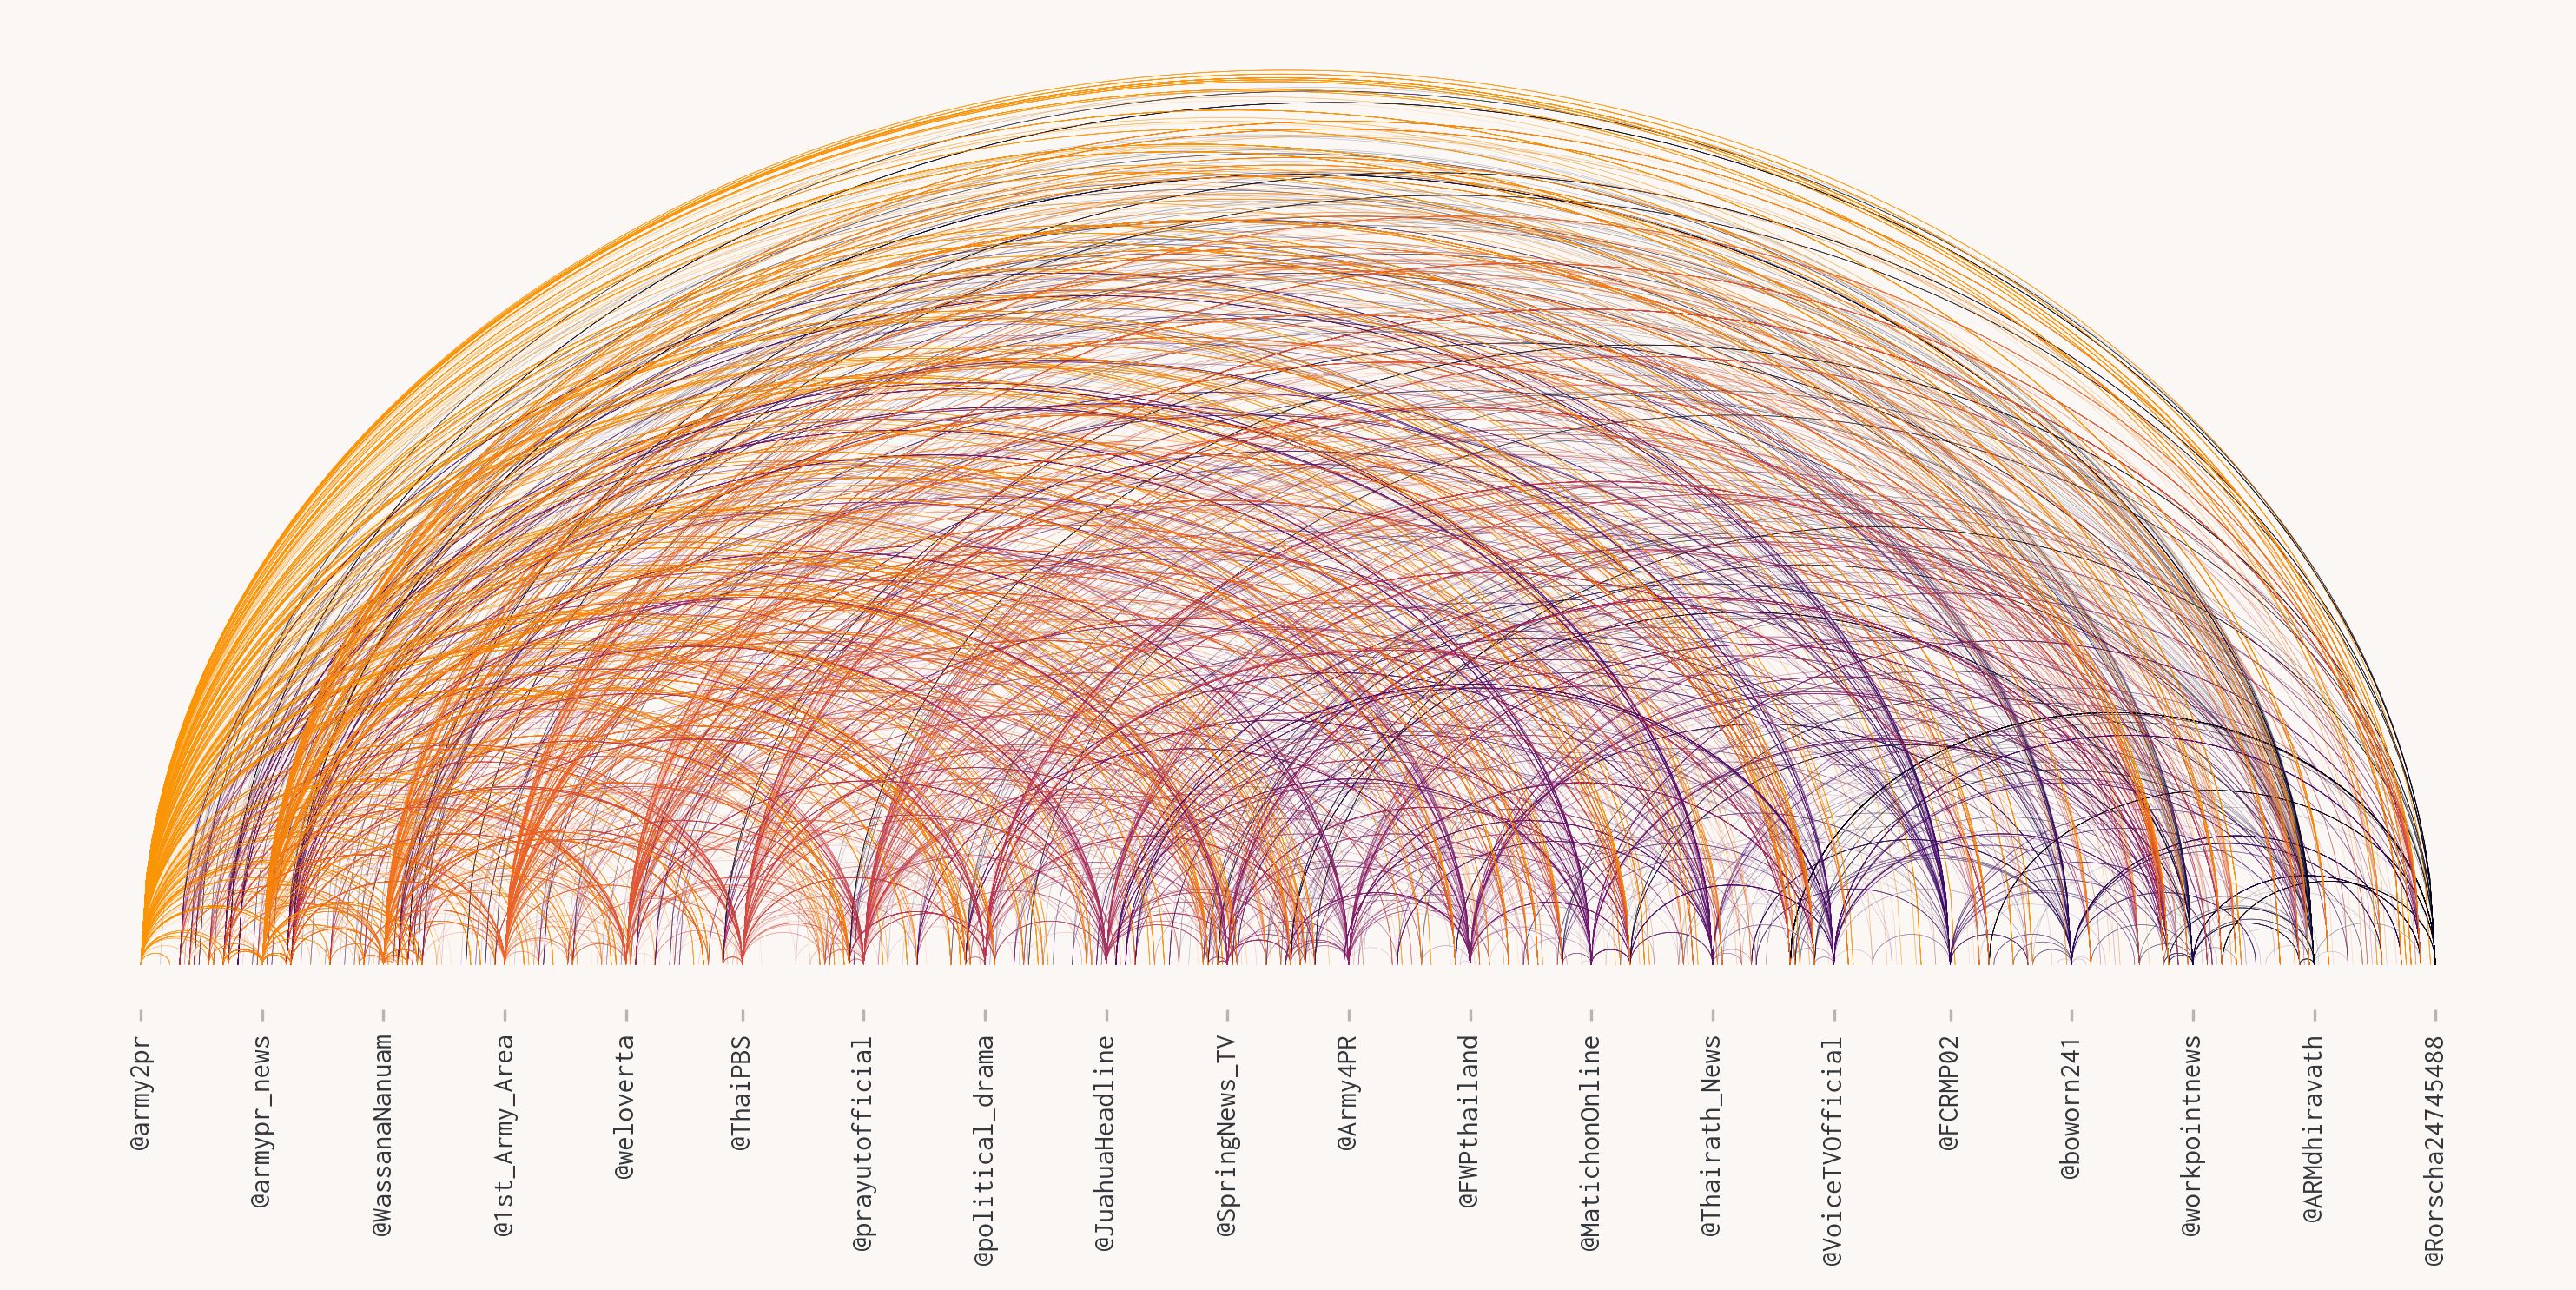

In [ ]:
fig = plt.figure()

for i, tweet in df.iterrows():
    # draw the line if a taken down tweet relate to most mentioned accounts
    io_user_id = tweet['userid']
    io_index = user_coor[user_coor['id'] == io_user_id]['coor'].values[0]
    
    for i, account in user_lookup.head(most_mentioned_account).iterrows():
        mentioned_account_id = account['user_id']
        if mentioned_account_id in tweet['tweet_text']:
            account_index = user_coor[user_coor['id'] == mentioned_account_id]['coor'].values[0]
            x, y = draw_circle(io_index, account_index, 400)
            sns.lineplot(x, y, linewidth=0.15, color=colours[i], alpha=0.25)

plt.xticks(mentioned_users_index, labels=user_lookup.head(most_mentioned_account)['user_id'], fontsize=8, rotation=90)
plt.yticks([], [])
plt.grid(False)
sns.despine(bottom=True, left=True)
# plt.savefig("./fig.jpg")
plt.show()